In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
db = pd.read_csv('/content/Diwali Sales Data.csv', encoding = 'unicode-escape')
db.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# *Data Preprocessing*

In [9]:
db.shape

(11251, 15)

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
db.drop(['Status','unnamed1'], axis=1, inplace= True)

In [12]:
pd.isnull(db).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [13]:
db.dropna(inplace=True)

In [14]:
db['Amount'] = db['Amount'].astype(int)

In [15]:
db['Amount'].dtypes

dtype('int64')

# *Data Inspection and Summary Statistics*

In [16]:
db.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
db.rename(columns = {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [18]:
db.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
db[['Age','Orders','Amount']].describe() # for specific columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# *Exploratory Data Analysis (EDA)*

1. Gender

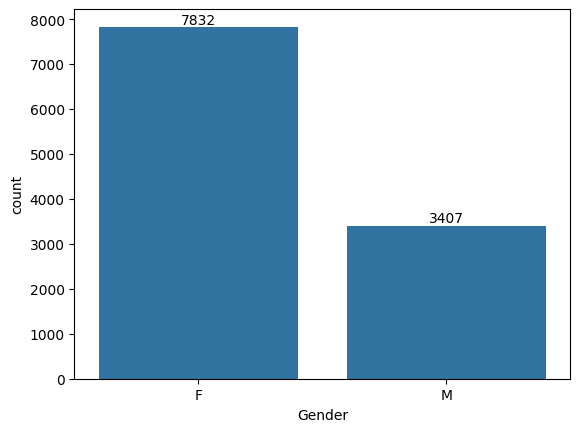

In [20]:
bar_chart = sns.countplot(x = 'Gender', data = db)

for bars in bar_chart.containers:
  bar_chart.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

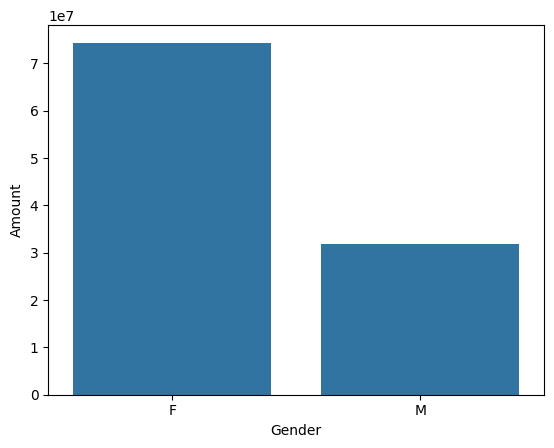

In [21]:
sales_gen = db.groupby(['Gender'],as_index = False)['Amount'].sum(). sort_values(by = 'Amount' , ascending = False)
sns.barplot(x='Gender', y= 'Amount', data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

2. Age

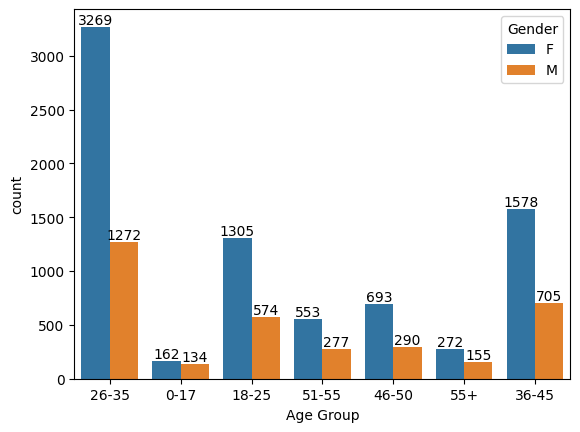

In [22]:
ax = sns.countplot(x = 'Age Group' ,hue = 'Gender', data = db)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

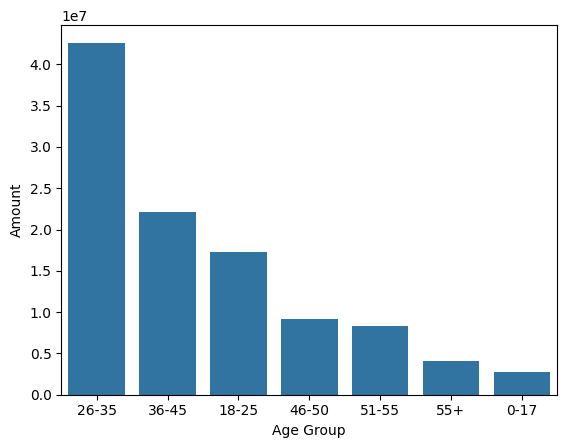

In [23]:
sales_age = db.groupby(["Age Group"] , as_index = False)['Amount'].sum().sort_values(by="Amount", ascending = False)

sns.barplot(x='Age Group', y = 'Amount', data = sales_age)

from above graphs we can see that most of the buyers are of age group between 26-35 yrs female

3. State

<Axes: xlabel='State', ylabel='Orders'>

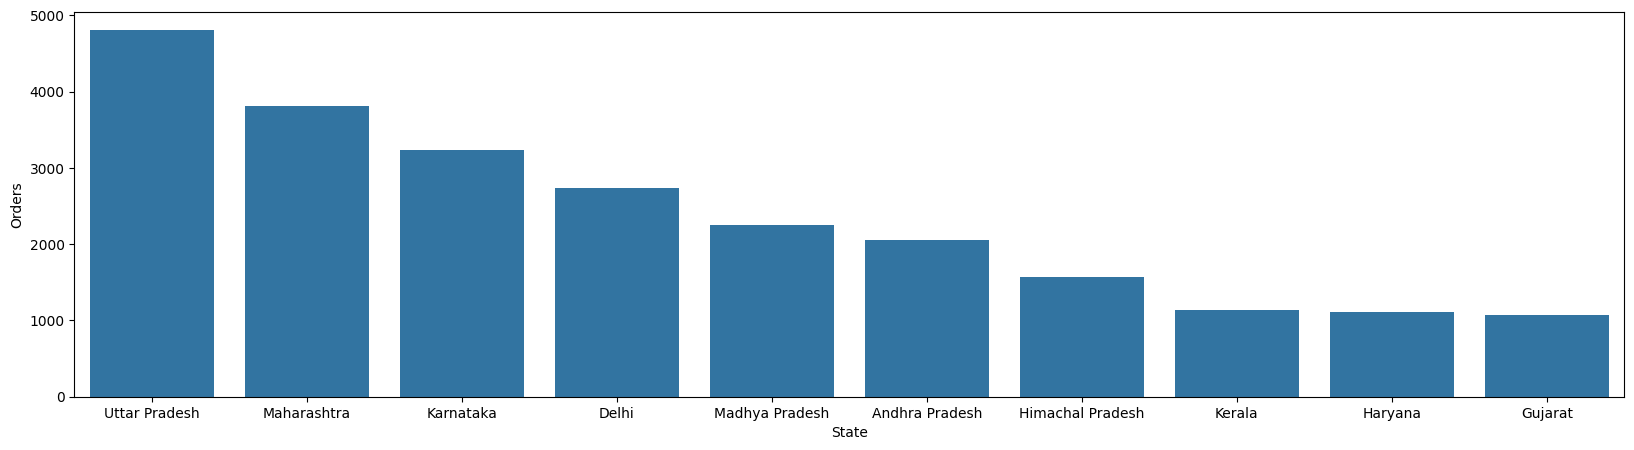

In [24]:
sales_state = db.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending= False ).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x = 'State', y='Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

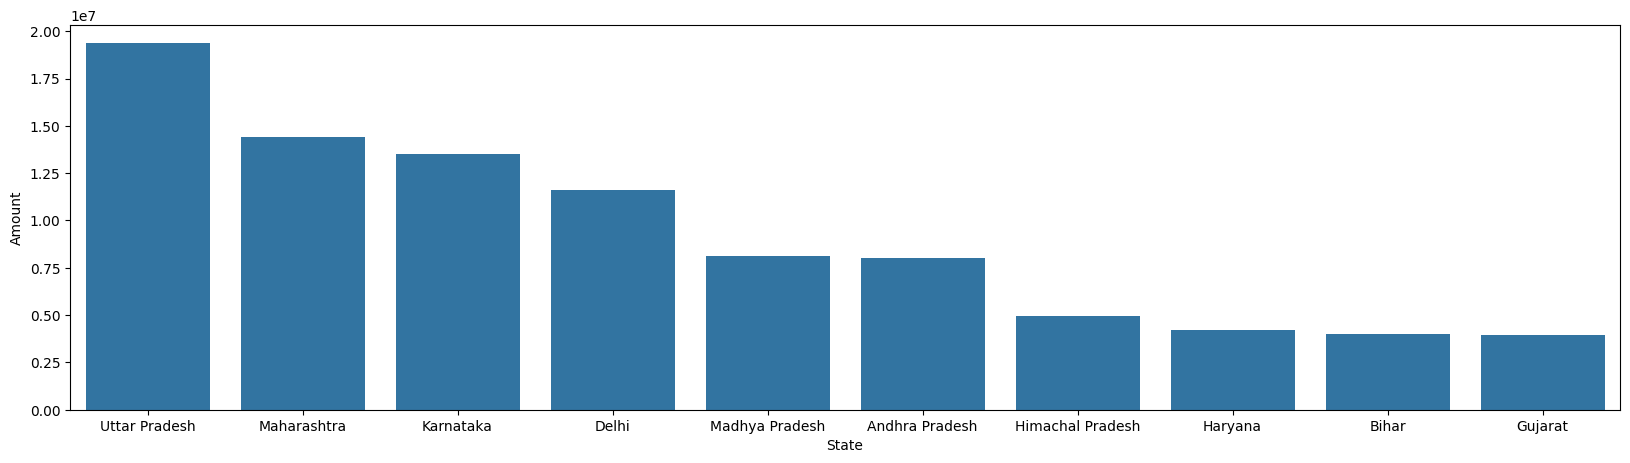

In [25]:
sales_state = db.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending= False ).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x = 'State', y='Amount', data = sales_state)

form above graph we can see that most of the orders and total sales/amount are from UP , Maharashtra , and karnataka

4. Marital status

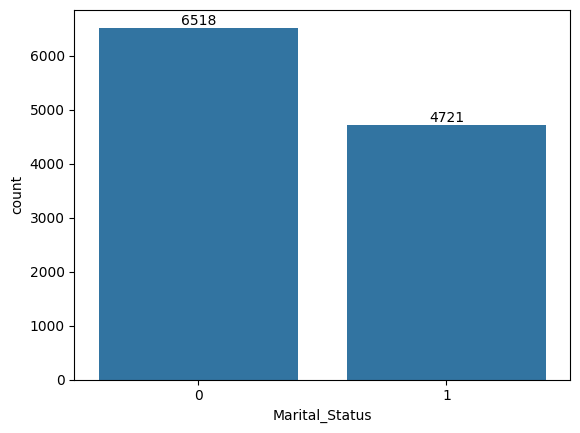

<Figure size 2000x500 with 0 Axes>

In [30]:
ax = sns.countplot(data = db , x = 'Marital_Status')

plt.figure(figsize=(20,5))
for bars in ax.containers:
  ax.bar_label (bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

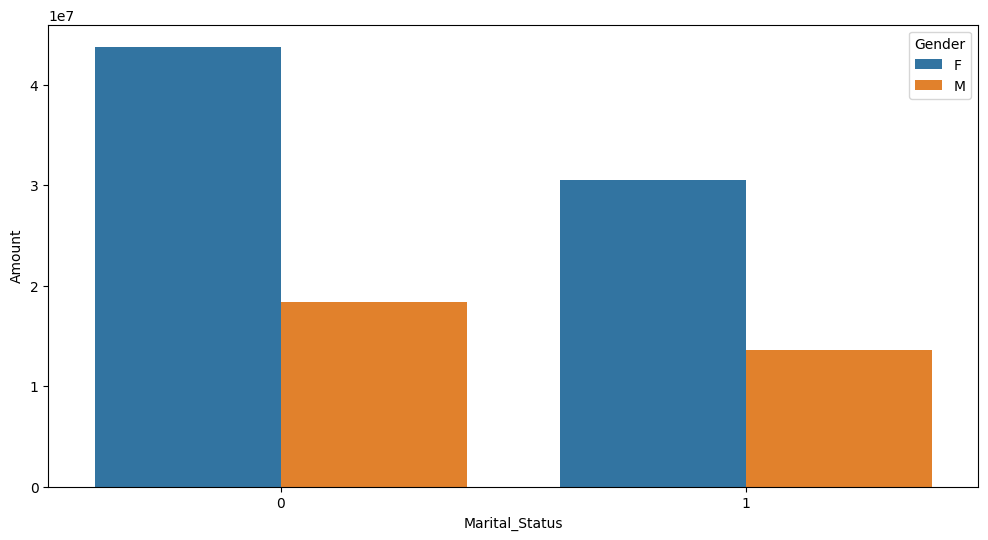

In [35]:
sales_state = db.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = "Gender")

From the above plot we can see that most of the buyers are married (women) and they have high purchasing power

5. occupation

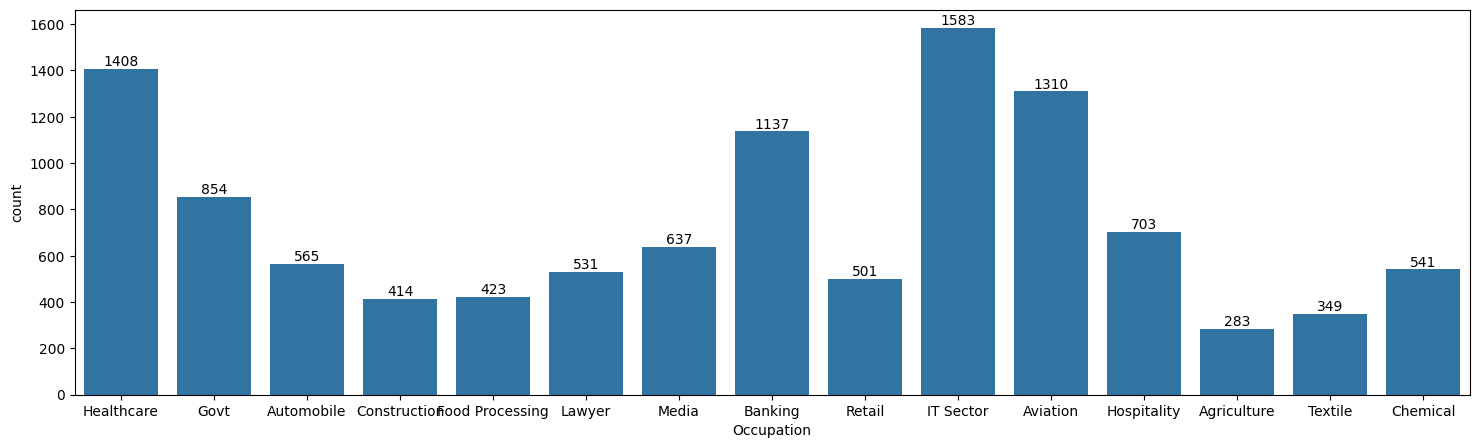

In [40]:
plt.figure(figsize = (18,5))
ax = sns.countplot(data = db , x = 'Occupation')

for bars in ax.containers:
 ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

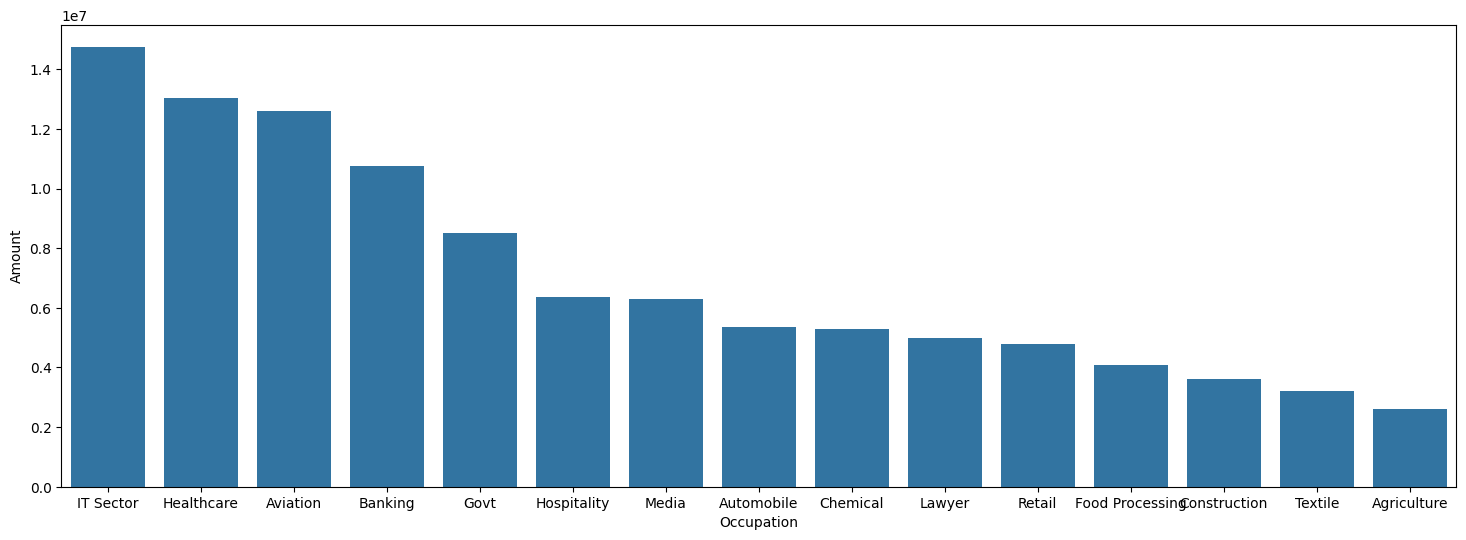

In [41]:
sales_state = db.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

plt.figure(figsize = (18,6))
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

from above graph we can see that most of the buyers are from IT sector , HealthCare and Aviation

6. Product Category

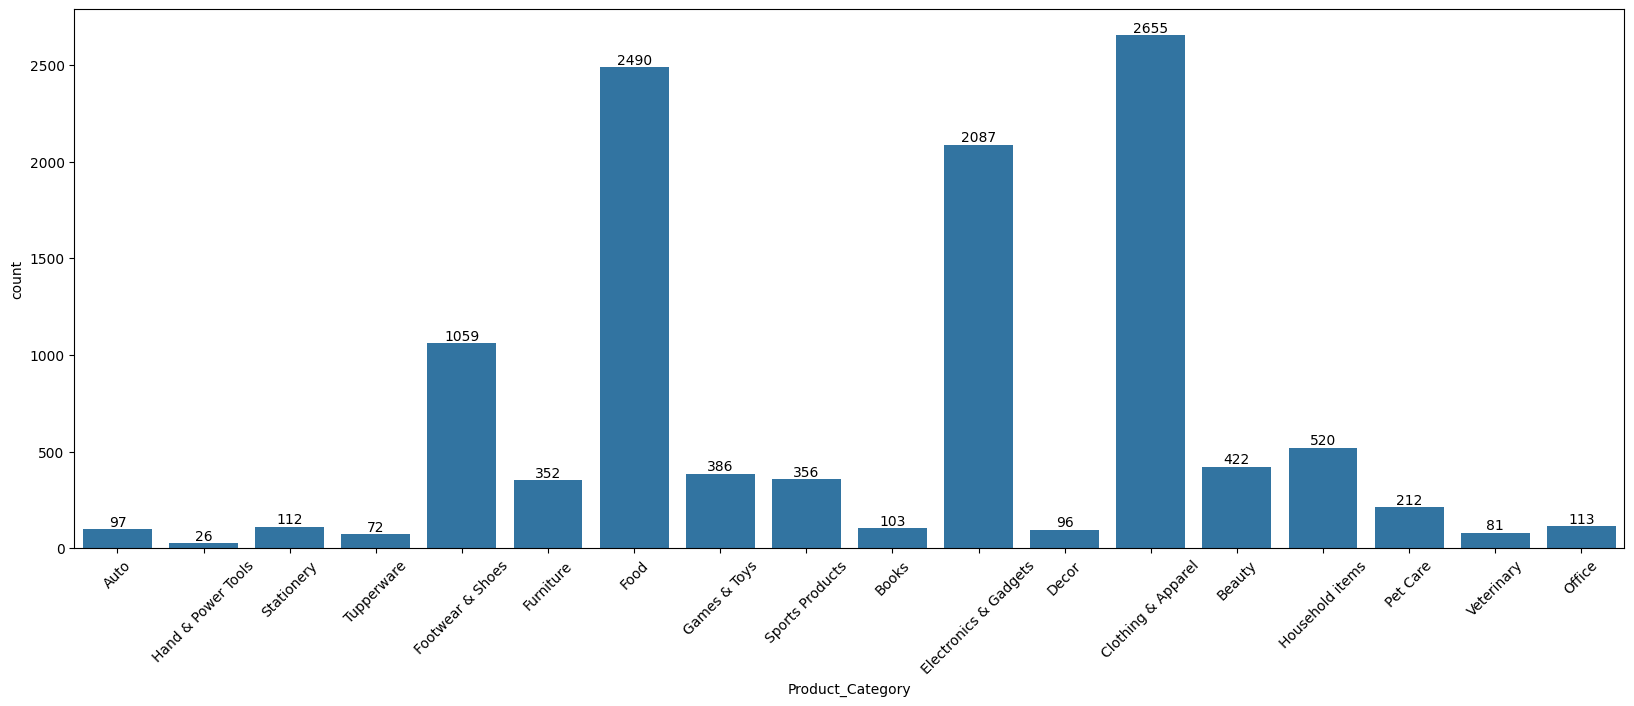

In [50]:
plt.figure(figsize = (20,7))
ax = sns.countplot(data = db , x = 'Product_Category')

for bar in ax.containers:
  ax.bar_label(bar)
  plt.xticks(rotation=45)

<Axes: xlabel='Product_Category', ylabel='Amount'>

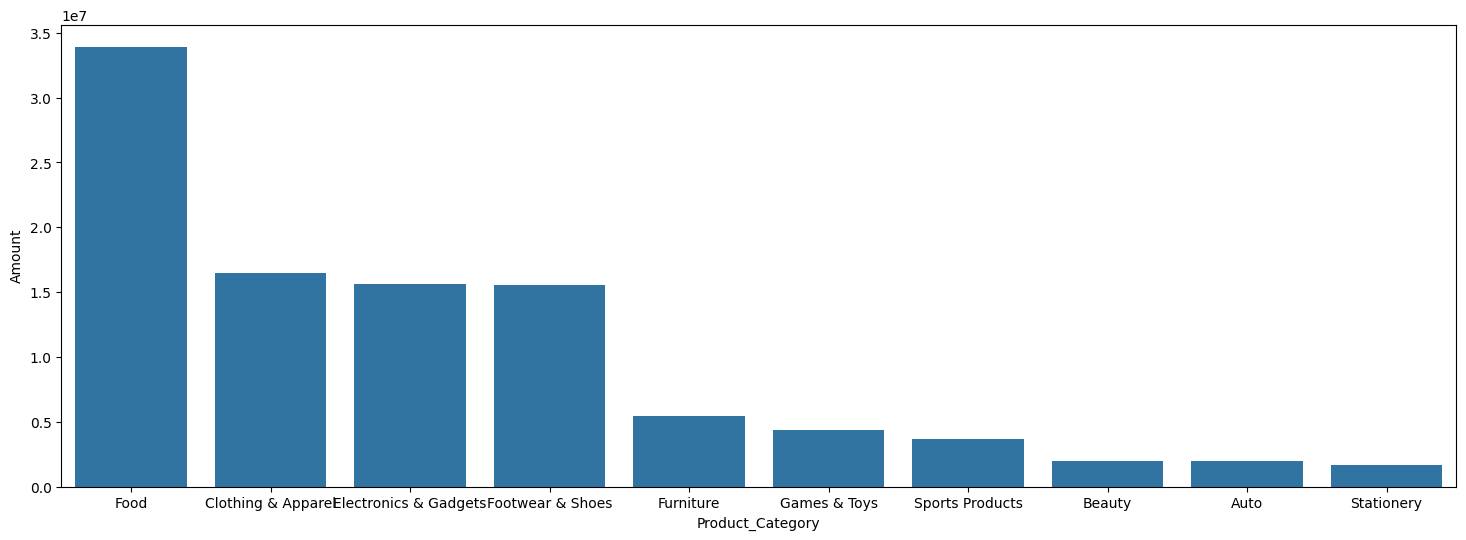

In [54]:
sales_state = db.groupby(['Product_Category'],as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

plt.figure(figsize = (18,6))
sns.barplot(data = sales_state, x = 'Product_Category' , y = 'Amount')

From the above graph we can see that most of the sold product are from food , clothing and electronic category

<Axes: xlabel='Product_ID', ylabel='Orders'>

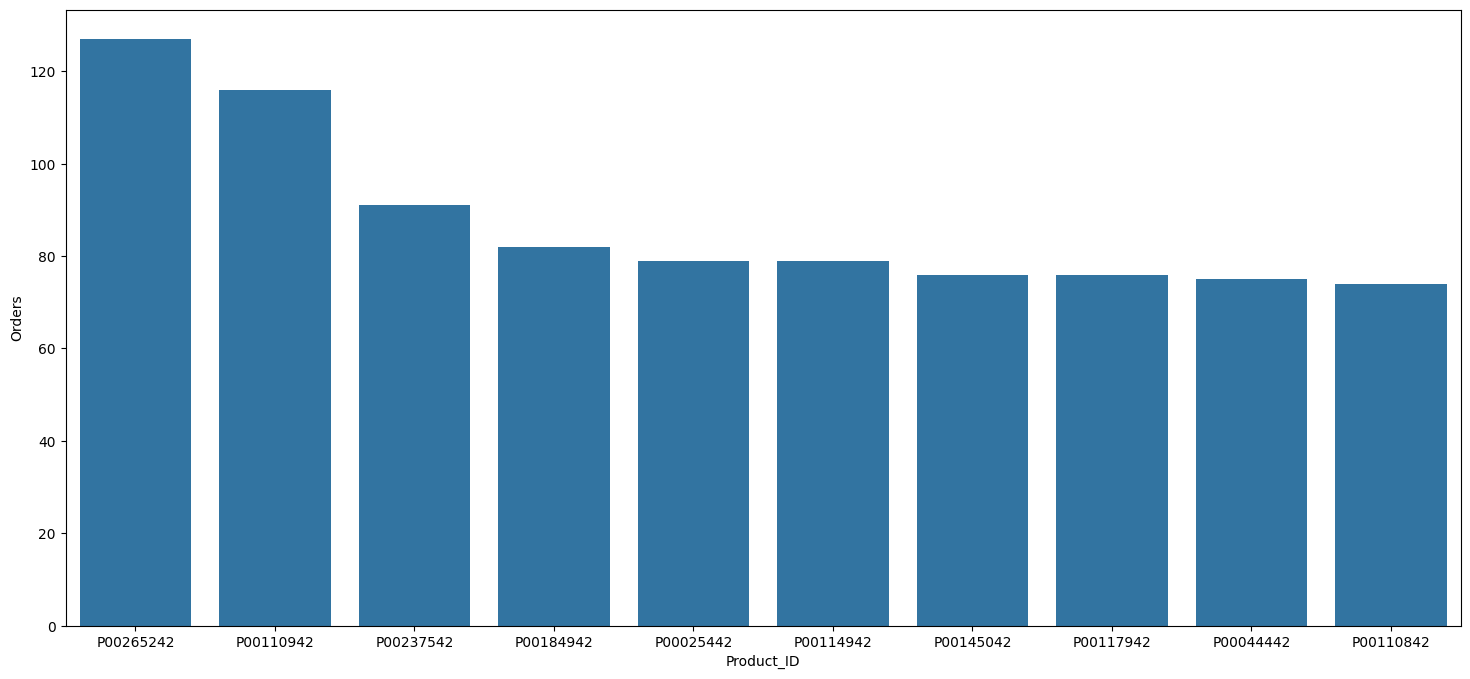

In [58]:
sales_state = db.groupby(['Product_ID'] , as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
plt.figure(figsize = (18,8))
sns.barplot( data = sales_state , x = 'Product_ID', y = 'Orders')

<Axes: xlabel='Product_ID'>

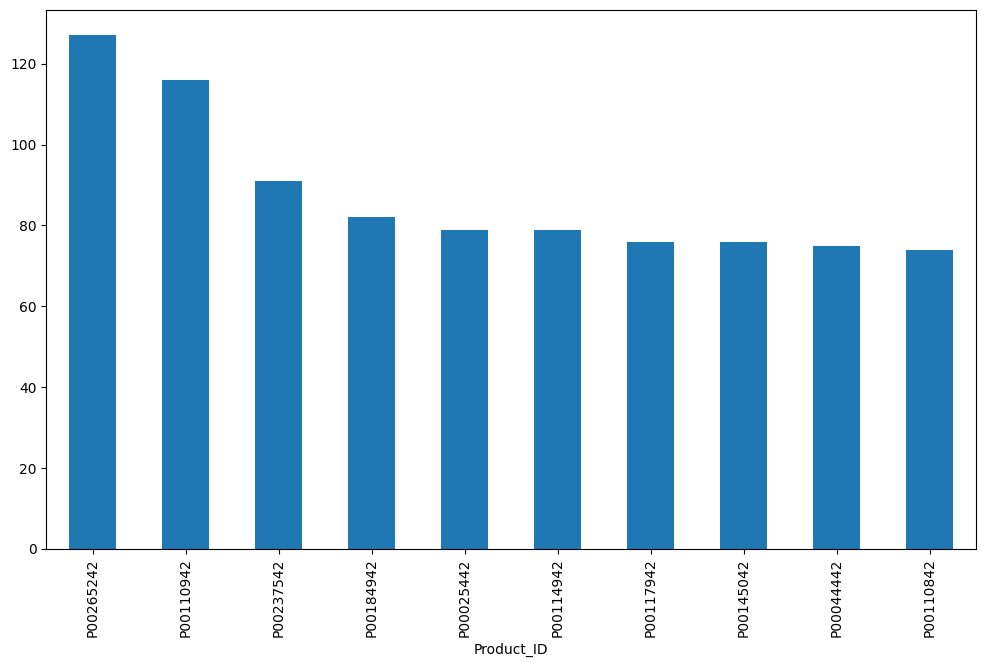

In [60]:
fig1 ,ax1 = plt.subplots(figsize = (12,7))
db.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind='bar')
# same thing as above

## ***Conclusion*** : Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category